In [134]:
import numpy as np 
import pandas as pd

path='phi_070.csv'
# path='iris.csv'
df = pd.read_csv(path)

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [136]:
x = df[['mean(nid)' ,'Median(nid)','IQR(nid)','Range(nid)']]
# x=df[['sepal.length','sepal.width','petal.length','petal.width']]

In [137]:
x

,mean(nid),Median(nid),IQR(nid),Range(nid)
0,-0.008293,-0.007804,0.059107,0.623557
1,-0.027038,-0.024809,0.083121,0.741234
2,-0.010665,-0.009881,0.063987,0.640409
3,-0.029888,-0.027418,0.085638,0.743484
4,-0.014029,-0.012977,0.069194,0.663985
...,...,...,...,...
595,-0.420932,-0.443914,0.155718,1.451266
596,-0.410942,-0.435468,0.161798,1.477821
597,-0.424596,-0.447165,0.153308,1.456235
598,-0.426979,-0.448809,0.150175,1.425861


In [138]:
le = preprocessing.LabelEncoder()
df['label'] = le.fit_transform(df.polymer.values)
y= df['label'].values

In [139]:
# df['polymer'] = le.fit_transform(df["polymer"])
# y= df['polymer']

In [140]:
print(y)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [142]:
x_train = Variable(torch.from_numpy(x_train)).float()
y_train = torch.LongTensor(y_train)
x_test  = Variable(torch.from_numpy(x_test)).float()
y_test  = torch.LongTensor(y_test)


In [143]:
print("X_Train Shape: ", x_train.shape)
print("X_Test Shape: ", x_test.shape)
print("Y_Train Shape: ", y_train.shape)
print("Y_Test Shape: ", y_test.shape)

X_Train Shape:  torch.Size([480, 4])
X_Test Shape:  torch.Size([120, 4])
Y_Train Shape:  torch.Size([480])
Y_Test Shape:  torch.Size([120])


In [144]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_dim,hidden,out):
        super(FeedForwardNN,self).__init__()
        self.relu=nn.ReLU()
        self.layer1 = nn.Linear(input_dim, hidden)
        self.layer2 = nn.Linear(hidden,hidden)
        self.layer3 = nn.Linear(hidden,out)
        
    def forward(self,x): 
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x= self.relu(self.layer3(x))
        return x

In [145]:
ffn = FeedForwardNN(input_dim = x_train.shape[1],hidden = 25,out=12)
optimizer = torch.optim.Adam(ffn.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

In [146]:
epochs = 1000
train_losses =np.zeros(epochs)
test_losses = np.zeros(epochs)

for epoch in range(epochs):
    y_pred = ffn(x_train)
    loss_train = loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    
    y_pred_test = ffn(x_test)
    loss_test = loss_fn(y_pred_test,y_test)
    train_losses[epoch] = loss_train.item()
    test_losses[epoch] = loss_test.item()

    
    if (epoch + 1) % 25 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss_train.item():.3f}, Test Loss: {loss_test.item():.3f}")

Epoch 25/1000, Train Loss: 2.402, Test Loss: 2.392
Epoch 50/1000, Train Loss: 2.319, Test Loss: 2.308
Epoch 75/1000, Train Loss: 2.236, Test Loss: 2.229
Epoch 100/1000, Train Loss: 2.168, Test Loss: 2.173
Epoch 125/1000, Train Loss: 2.113, Test Loss: 2.121
Epoch 150/1000, Train Loss: 2.069, Test Loss: 2.073
Epoch 175/1000, Train Loss: 2.031, Test Loss: 2.036
Epoch 200/1000, Train Loss: 1.997, Test Loss: 2.006
Epoch 225/1000, Train Loss: 1.965, Test Loss: 1.978
Epoch 250/1000, Train Loss: 1.935, Test Loss: 1.954
Epoch 275/1000, Train Loss: 1.907, Test Loss: 1.931
Epoch 300/1000, Train Loss: 1.880, Test Loss: 1.905
Epoch 325/1000, Train Loss: 1.854, Test Loss: 1.879
Epoch 350/1000, Train Loss: 1.829, Test Loss: 1.854
Epoch 375/1000, Train Loss: 1.804, Test Loss: 1.828
Epoch 400/1000, Train Loss: 1.780, Test Loss: 1.802
Epoch 425/1000, Train Loss: 1.758, Test Loss: 1.775
Epoch 450/1000, Train Loss: 1.738, Test Loss: 1.751
Epoch 475/1000, Train Loss: 1.722, Test Loss: 1.731
Epoch 500/1000,

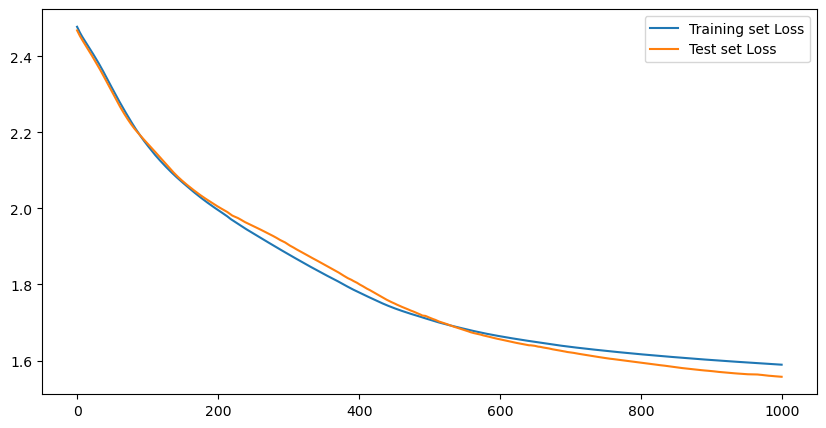

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(data = train_losses,palette='viridis',label='Training set Loss')
sns.lineplot(data = test_losses,palette='viridis',label='Test set Loss')
plt.legend()
plt.show()

In [151]:
# def performance_measurment(cm):
   
#     FP = cm.sum(axis=1) - np.diag(cm) #FP-False Positive 
#     FN = cm.sum(axis=0) - np.diag(cm) #FN-False Negatives
#     TP = np.diag(cm)                  #TP-True Positive
#     TN = cm.sum() - (FP + FN + TP)    #TN-True Negatives

#     FP = FP.astype(float)
#     FN = FN.astype(float)
#     TP = TP.astype(float)
#     TN = TN.astype(float)

#     ACC1 = np.round((TP+TN)/(TP+FP+FN+TN),decimals=2) #Accuracy
#     precision1 = np.round((TP / (TP + FP)),decimals=2) #Precision
#     recall1 = np.round((TP / (TP + FN)),decimals=2)   #Recall
#     F1_SCORE1 = np.round((2*recall1*precision1)/(recall1+precision1),decimals=2) #F1-Score

    
#     return ACC1, precision1, recall1, F1_SCORE1

In [152]:
# precision=round(precision_score(y_test, y_pred,average='weighted'),2)
# recall=round(recall_score(y_test, y_pred,average='weighted'),2)
# accuracy=round(accuracy_score(y_test, y_pred),2)
# F1_SCORE=round(f1_score(y_test, y_pred,average='weighted'),2)

# cm = confusion_matrix(y_pred, y_test)

# ACC1, precision1, recall1, F1_SCORE1 = performance_measurment(cm)
# degrees = 35

# class_names = [" PA ", " PC ", " PE ", " PP ", " PS "," POM "," PVC "," PET "," PU "," ABS "," PE-LD "," SAN "]
# plot_confusion_matrix(mlp, x_test, y_test,display_labels=class_names,xticks_rotation=degrees,cmap=plt.cm.Blues)
# plt.title("MLP_Classifier_Combination:" + str(name))
# print("Combination:" + str(name) +"  Accuracy: " + str(accuracy) +  "\nPrecision: "+ str(precision)+"  Recall: "+ str(recall)  + "  F1-SCORE: "+ str(F1_SCORE))
# print("Combination:" + str(name) +"  Accuracy_Matrix: " + str(ACC1) +  "\nPrecision_Matrix: "+ str(precision1) +"\n  Recall_MAtrix: "+ str(recall1) + "\n F1-SCORE_Matrix: "+ str(F1_SCORE1))

# plt.savefig("phy_000.png")
# #plt.savefig(r'C:\pyyy\auswertung\polymers\MLP_without_early_stopping\\' +name+"_mlp_classifier_without_early_stopping.png")

In [153]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

NameError: name 'model' is not defined

In [ ]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [ ]:
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

In [ ]:
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")